<a href="https://colab.research.google.com/github/jaehunkang123/AI-School/blob/main/2_DL_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
keras.__version__

'2.12.0'

In [ ]:
from keras.datasets import mnist
(train_images,train_labels),(test_images,test_labels) = mnist.load_data() # 튜플타입


In [ ]:
train_images.shape # 60000건의 데이터

(60000, 28, 28)

In [ ]:
test_images.shape # 60000건으로 학습 이후, 10000건을 테스트

(10000, 28, 28)

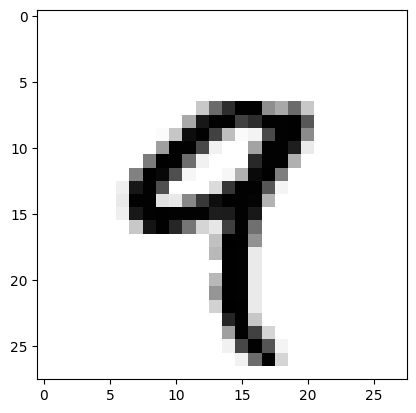

In [ ]:
# 데이터의 확인
import matplotlib.pyplot as plt

digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)

In [ ]:
# 신경망을 만드는 부분

from keras import models
from keras import layers

network = models.Sequential()
# LAYER 2개
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax')) # 나가는 것
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
# 데이터를 준비하는 부분

train_images = train_images.reshape((60000, 28*28)) # reshape으로 차원이 하나 내려옴 (2차원됨)
train_images = train_images.astype('float32') / 255 # 원래 0~255 정수형인데, 실수형(0.0~255.0)으로 바꾸며 학습에 적당한 데이터로 숫자 크기 조절

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255

In [ ]:
# 라벨 데이터를 카테고리 데이터로 전환
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# 신경망의 학습
network.fit(train_images, train_labels, epochs=5, batch_size=128) 

Epoch 1/5
469/469 [==============================] - 7s 12ms/step - loss: 0.2657 - accuracy: 0.9244
Epoch 2/5
469/469 [==============================] - 5s 11ms/step - loss: 0.1072 - accuracy: 0.9682
Epoch 3/5
469/469 [==============================] - 7s 14ms/step - loss: 0.0694 - accuracy: 0.9793
Epoch 4/5
469/469 [==============================] - 5s 10ms/step - loss: 0.0502 - accuracy: 0.9851
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0379 - accuracy: 0.9892


In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test acc:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0707 - accuracy: 0.9777
test acc: 0.9776999950408936


In [ ]:
#IMDB, 영화 리뷰 예제

from keras.datasets import imdb
(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words=10000) 
# num_words=10000 옵션은 출연빈도 높은 10000개만 가져온다는 의미



In [ ]:
train_data.shape

(25000,)

In [ ]:
train_data[0] # 단어를 숫자로 변형 후 학습

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
train_labels[0:5] # 긍정 1, 부정 0으로 분류

array([1, 0, 0, 1, 0])

In [ ]:
max([max(sequence) for sequence in train_data]) # for문의 결과가 앞으로 전달, max값을 볼 수 있음
# max 리스트에서 또 max 값을 뽑는다

9999

In [ ]:
# 데이터를 준비
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  result = np.zeros((len(sequences),dimension))

  print(result.shape)

  for i, sequence in enumerate(sequences):
    result[i, sequence] = 1 # 단어있는 곳에 1을 채워넣겠다.
  return result

In [ ]:
x_train = vectorize_sequences(train_data) # 함수에다가 train_data 입력
x_test = vectorize_sequences(test_data)

(25000, 10000)
(25000, 10000)


In [ ]:
x_train[0] # 1이란 단어가 있는 문장 형태이다.

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
# 라벨 데이터도 실수형으로
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [ ]:
y_train[0]

1.0

In [ ]:
from keras.optimizers import optimizer
# 신경망 제막
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,))) # 인풋 layer, 폭이 10000개짜리 데이터 (입력 데이터)
model.add(layers.Dense(16, activation='relu')) # 은닉 layer
model.add(layers.Dense(1, activation='sigmoid')) # 아웃풋, 부정인지 긍정인지 2진 분류 문제 - 1개만 있으면 됨
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy']) # 둘중 하나라 바이너리


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
# 학습
# 학습 저장 history = 
# 학습용 1개 / 검증용 1개
history = model.fit(partial_x_train, partial_y_train, epochs=5, batch_size=512, validation_data=(x_val, y_val))


Epoch 1/5
30/30 [==============================] - 3s 67ms/step - loss: 0.5274 - accuracy: 0.7759 - val_loss: 0.4020 - val_accuracy: 0.8590
Epoch 2/5
30/30 [==============================] - 1s 43ms/step - loss: 0.3185 - accuracy: 0.8966 - val_loss: 0.3239 - val_accuracy: 0.8729
Epoch 3/5
30/30 [==============================] - 1s 42ms/step - loss: 0.2332 - accuracy: 0.9219 - val_loss: 0.2828 - val_accuracy: 0.8877
Epoch 4/5
30/30 [==============================] - 2s 69ms/step - loss: 0.1944 - accuracy: 0.9321 - val_loss: 0.2757 - val_accuracy: 0.8870
Epoch 5/5
30/30 [==============================] - 2s 55ms/step - loss: 0.1608 - accuracy: 0.9472 - val_loss: 0.2896 - val_accuracy: 0.8846


In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

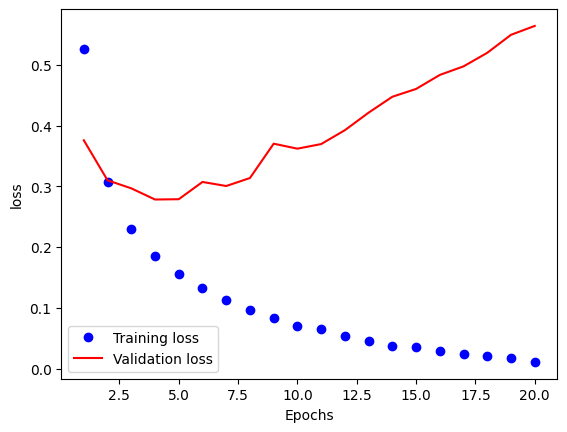

In [ ]:
# 결과 시각화
import matplotlib.pyplot as plt

acc = history.history['accuracy'] # x값
loss = history.history['loss'] # y값
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

# 밑의 그래프 보면 상반된 모습,
# 4번째에서 벗어 나야 됨. 5번째부터 오버피팅

plt.plot(epochs, loss, 'bo', label='Training loss') # 선에 대한 라벨
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.xlabel('Epochs') # x,y 라벨
plt.ylabel('loss')
plt.legend()




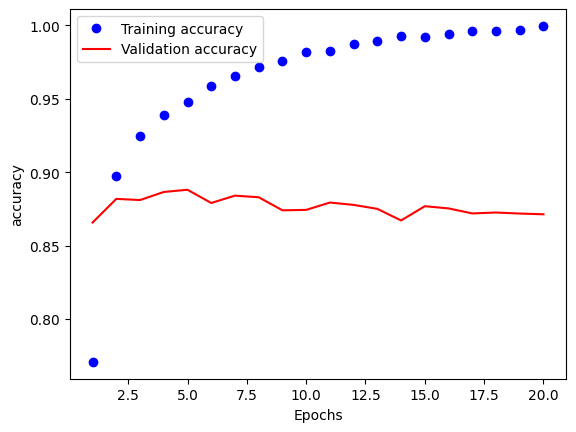

In [ ]:
# accuracy 관련 데이터 시각화

plt.plot(epochs, acc, 'bo', label='Training accuracy') # 선에 대한 라벨
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.xlabel('Epochs') # x,y 라벨
plt.ylabel('accuracy')
plt.legend()

In [ ]:
# 전체를 돌리고 나서 최적의 epochs을 찾고 입력후 다시 돌린다.
# 그리고 그 모델을 사용하는 것이 가장 좋다.
# 밑은 예측된 결과
# 리뷰는 이중 분류라 다중 분류보다는 쉬운 편
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.2905442 ],
       [0.99922556],
       [0.9601049 ],
       ...,
       [0.09413494],
       [0.1564447 ],
       [0.7952417 ]], dtype=float32)

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('loss={0}, accuracy={1}'.format(test_loss, test_acc))

782/782 [==============================] - 3s 4ms/step - loss: 0.3039 - accuracy: 0.8755
loss=0.3039465546607971, accuracy=0.8754799962043762
